<a href="https://colab.research.google.com/github/jmcconne100/Pandas_Notebook_Project/blob/main/my_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files, drive

def load_csv(method="upload", source=None, concat=False, **read_csv_kwargs):
    """
    Load CSVs in Colab using one of three methods:
      - "upload": upload from local machine
      - "drive": read from Google Drive
      - "web": read from URL(s)

    Args:
        method: "upload" | "drive" | "web"
        source: file path(s) or URL(s); not needed for upload
        concat: if True, combine all CSVs into one DataFrame
        **read_csv_kwargs: passed to pandas.read_csv()

    Returns:
        A DataFrame (if concat=True or one file) or dict of {name: DataFrame}

    Examples:
        df1 = load_csv("upload")

        path = "/content/drive/MyDrive/data/UScomments.csv"
        df2 = load_csv("drive", path)

        url = "https://people.sc.fsu.edu/~jburkardt/data/csv/addresses.csv"
        df3 = load_csv("web", url)
    """
    defaults = {"on_bad_lines": "skip"}
    kwargs = {**defaults, **(read_csv_kwargs or {})}

    method = method.lower()
    dfs = {}

    if method == "upload":
        uploaded = files.upload()
        for name in uploaded.keys():
            dfs[name] = pd.read_csv(name, **kwargs)

    elif method == "drive":
        drive.mount("/content/drive", force_remount=False)
        if isinstance(source, str):
            source = [source]
        for path in source:
            dfs[path.split("/")[-1]] = pd.read_csv(path, **kwargs)

    elif method == "web":
        if isinstance(source, str):
            source = [source]
        for url in source:
            dfs[url.split("/")[-1]] = pd.read_csv(url, **kwargs)

    else:
        raise ValueError("method must be one of: 'upload', 'drive', 'web'")

    if concat:
        return pd.concat(list(dfs.values()), ignore_index=True)
    return dfs if len(dfs) > 1 else next(iter(dfs.values()))

In [ ]:
method = "upload" # can put in upload, drive, or web
# Note if picking drive specify a path and if picking web specify a URL

df1 = load_csv(method)
df1.head()

Saving UScomments.csv to UScomments (1).csv


/tmp/ipython-input-3350407729.py:41: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[name] = pd.read_csv(name, **kwargs)


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


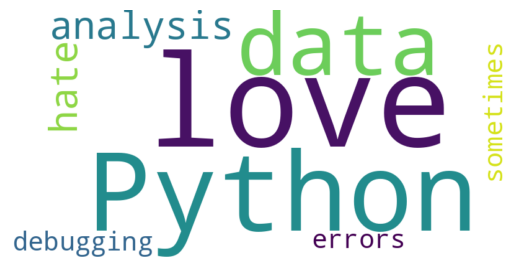

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

text = "I love Python and data analysis but I hate debugging errors sometimes."
stop_words = set(stopwords.words('english'))

# Remove stopwords
filtered_text = ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# pip installs (run once)
!pip install emoji regex plotly pandas

import pandas as pd
import emoji
import regex as re
from collections import Counter
import plotly.express as px

# Robust grapheme splitter so flags / family sequences stay intact
GRAPHEME = re.compile(r'\X', re.UNICODE)

def extract_emojis(text: str) -> list[str]:
    # Keep grapheme clusters that contain at least one emoji codepoint
    return [g for g in GRAPHEME.findall(text) if any(ch in emoji.EMOJI_DATA for ch in g)]

# Example corpus (replace with yours)
messages = [
    "Love this! 😍🔥",
    "Hahaha 😂😂",
    "Ok 👍🏽👍🏽 meeting at 3pm 🕒",
    "New PR merged ✅🚀🚀🚀🚀🚀",
    "Ugh… Mondays 😒☕",
    "Flags work too 🇺🇸🇨🇦 😍😍😍",
    "🙂🙂🙂",
    "🤣😔😔😔😔"
]

# Flatten all emojis
all_emojis = [e for msg in messages for e in extract_emojis(msg)]

freq = Counter(all_emojis)
df_freq = pd.DataFrame(freq.items(), columns=["emoji", "count"]).sort_values("count", ascending=False)

# Bar chart of the top 20 emojis
fig = px.bar(df_freq.head(20), x="emoji", y="count", text="count",
             title="Top Emojis")
fig.update_traces(textposition="outside")
fig.update_layout(xaxis_title="Emoji", yaxis_title="Count")
fig.show()